# Loan Exploration

In [63]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [64]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [2]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

In [5]:
df.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

In [6]:
df["account_bsheet_desig"].describe()

count     77070
unique        3
top       Asset
freq      52021
Name: account_bsheet_desig, dtype: object

### get the unique values in the balance sheet designation column

In [7]:
df.account_bsheet_desig.unique()

array(['Asset', nan, 'Liability', 'Insurance'], dtype=object)

In [10]:
df["account_bsheet_desig"].value_counts()

Asset        52021
Liability    23078
Insurance     1971
Name: account_bsheet_desig, dtype: int64

In [11]:
df["account_bsheet_desig"].isnull().value_counts()

True     406879
False     77070
Name: account_bsheet_desig, dtype: int64

### So most transactions are neither of the three. I wonder why.

### Now let's look at other columns that might be interesting for the loans.

In [13]:
df["trx_class_code"].describe()

count     483949
unique         5
top         opex
freq      283942
Name: trx_class_code, dtype: object

In [14]:
df["trx_class_code"].unique()

array(['findev', 'cash', 'opex', 'income', 'assets'], dtype=object)

In [15]:
df["trx_class_desc"].unique()

array(['Borrowing, lending, savings or insurance mediated through any financial device/ institution',
       'Cash (Cash on hand; cash lost, stolen or missing)',
       'Operational (Personal or household) expenditure for any purpose',
       'Income (includes agricultural or business expenses) from any source',
       'Asset purchase or sale'], dtype=object)

In [16]:
df["trx_family_code"].describe()

count     483949
unique        44
top         FOOD
freq      163483
Name: trx_family_code, dtype: object

In [17]:
df["trx_family_code"].unique()

array(['INFP2P', 'CASH', 'INFGRP', 'INFSAVHOM', 'COMM', 'MOBMNY', 'SEI',
       'FOOD', 'SUPPCRD', 'FRMLN', 'ARREARS', 'FRMSAVWA', 'CITMPC', 'REI',
       'PERS', 'LAYAWAY', 'ENRGY', 'RG', 'FRMSAVRA', 'OTH', 'OTHER',
       'EDU', 'CLTH', 'RIOI', 'ADVANCE', 'TRNSP', 'EMPLN', 'RR', 'REL',
       'ENT', 'CLN', 'FRMINS', 'ALC', 'H20', 'AGRI', 'MED', 'PAWN',
       'PRCH', 'HSNG', 'PSTHR', 'LOSS', 'SALE', 'NEINCG', 'GIFT'],
      dtype=object)

## Let's only keep the formal loans. (family code FRMLN)

In [24]:
df[df["trx_family_code"] == "FRMLN"].shape

(1429, 58)

In [29]:
df["trx_family_code"].value_counts()

FOOD         163483
SEI           71156
ENRGY         25273
COMM          25011
TRNSP         23549
INFGRP        20516
INFP2P        19828
MOBMNY        14665
CITMPC        12193
RR            10958
CLN           10589
H20            8967
AGRI           8115
CASH           7599
INFSAVHOM      7232
EDU            5438
FRMSAVWA       5352
PERS           4522
RIOI           4334
REL            4226
ALC            4144
SUPPCRD        4050
RG             3623
REI            3521
OTH            2938
MED            2389
CLTH           1725
HSNG           1505
FRMLN          1429
ARREARS        1402
FRMSAVRA       1220
PRCH            644
FRMINS          553
NEINCG          354
LAYAWAY         287
ADVANCE         280
SALE            229
ENT             183
PSTHR           163
OTHER           129
EMPLN           111
LOSS             26
GIFT             22
PAWN             16
Name: trx_family_code, dtype: int64

In [30]:
#df.groupby("trx_family_code").count()

In [35]:
df[df["trx_family_code"] == "FRMLN"].head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
27,KVIHK40,NaN,10sep2012,03oct2013,388,13,06=Cleaning interview,04oct2013,10,2013,...,NaN,NaN,NaN,101300.0,1191.7650,0,NaN,NaN,NaN,13.379310
70,KMAKE06,NaN,02oct2012,30sep2013,363,12,06=Cleaning interview,25sep2013,9,2013,...,NaN,NaN,NaN,16800.0,197.6471,0,NaN,NaN,NaN,6.965517
86,KELDK18,NaN,08sep2012,10oct2013,397,13,04=Diaries Interview,12apr2013,4,2013,...,NaN,NaN,NaN,40000.0,470.5882,0,NaN,NaN,NaN,5.000000
87,KELDK18,NaN,08sep2012,10oct2013,397,13,06=Cleaning interview,10oct2013,10,2013,...,NaN,NaN,NaN,10000.0,117.6471,0,NaN,NaN,NaN,7.310345
114,KELDK36,NaN,14sep2012,05nov2013,417,14,06=Cleaning interview,16oct2013,10,2013,...,NaN,NaN,NaN,73821.0,868.4824,0,NaN,NaN,NaN,0.275862


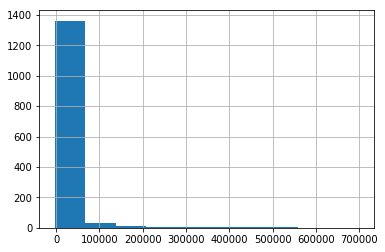

In [36]:
df[df["trx_family_code"] == "FRMLN"]["trx_value_kes"].hist()

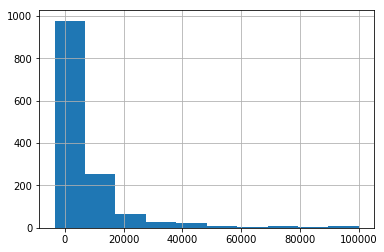

In [44]:
df[(df["trx_family_code"] == "FRMLN") & (df["trx_value_kes"] <= 100000)]["trx_value_kes"].hist()

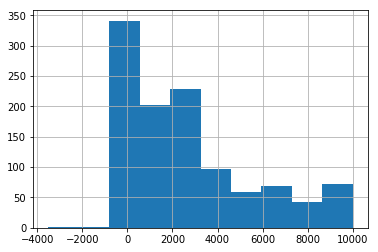

In [49]:
df[(df["trx_family_code"] == "FRMLN") & (df["trx_value_kes"] <= 10000)]["trx_value_kes"].hist()

In [48]:
df[(df["trx_family_code"] == "FRMLN") & (df["trx_value_kes"] <= 100)].shape

(142, 58)

### The following must be wrong, since they have negative values.

In [54]:
df[(df["trx_family_code"] == "FRMLN") & (df["trx_value_kes"] < 0)]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
12980,KVIHC05,NaN,17sep2012,01nov2013,410,14,04=Diaries Interview,23sep2013,9,2013,...,NaN,NaN,NaN,-1000.0,-11.76471,0,NaN,NaN,NaN,12.79310
17606,KNBOK19,NaN,14nov2012,01nov2013,352,12,04=Diaries Interview,01nov2013,11,2013,...,NaN,NaN,NaN,-3500.0,-41.17647,0,NaN,NaN,NaN,12.13793


In [52]:
df[(df["trx_family_code"] == "FRMLN") & (df["trx_value_kes"] < 0)].iloc[0]

hh_ids                                                                  KVIHC05
unique_hhs                                                                  NaN
first_trx_date_hh                                                     17sep2012
last_trx_date_hh                                                      01nov2013
tot_hh_daysofobs                                                            410
tot_hh_monthsofobs                                                           14
interview_designation                                      04=Diaries Interview
int_date                                                              23sep2013
int_month                                                                     9
int_year                                                                   2013
int_yr_mo                                                               2013_09
first_int_date                                                        29aug2012
account_ids                             

In [53]:
df[(df["trx_family_code"] == "FRMLN") & (df["trx_value_kes"] < 0)].iloc[1]

hh_ids                                                                  KNBOK19
unique_hhs                                                                  NaN
first_trx_date_hh                                                     14nov2012
last_trx_date_hh                                                      01nov2013
tot_hh_daysofobs                                                            352
tot_hh_monthsofobs                                                           12
interview_designation                                      04=Diaries Interview
int_date                                                              01nov2013
int_month                                                                    11
int_year                                                                   2013
int_yr_mo                                                               2013_11
first_int_date                                                        19jan2013
account_ids                             

### Both of these negative values are closing balances, let's look at these.

In [58]:
df[df["trx_mode_desc"]=="CLOSING BALANCE"].shape

(5207, 58)

In [67]:
df[df["trx_mode_desc"]=="CLOSING BALANCE"].head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,2013_10,08sep2012,58134738501900000,1.0,58134383397900000,NaN,Asset,Close,Informal,Less liquid,02oct2013,02oct2013,0,0,108138072959900000,58134383397900000,02oct2013,10,2013,2013_10,18.0,394,13,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.58621
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,2013_10,05sep2012,56134804374600000,NaN,65134441430300000,NaN,Liability,Close,Informal,NaN,17oct2012,02oct2013,350,12,105138073330800000,65134441430300000,02oct2013,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.00000
13,KMAKE25,NaN,25sep2012,12oct2013,382,13,04=Diaries Interview,01oct2013,10,2013,2013_10,25sep2012,63134736324600000,NaN,63134458362700000,NaN,Insurance,Close,Informal,NaN,29sep2012,01oct2013,367,12,63138301746700000,63134458362700000,01oct2013,10,2013,2013_10,19.0,371,12,367,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3248,Welfare Group,3. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,12.79310
19,KVIHK01,NaN,18sep2012,28sep2013,375,12,05=Module,28sep2013,9,2013,2013_09,03sep2012,60135433709100000,NaN,60134423402600000,NaN,Liability,NaN,Formal,NaN,27nov2012,28sep2013,305,10,105140420923300000,60134423402600000,28sep2013,9,2013,2013_09,24.0,375,12,305,10,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,INCREASE--Unexplained balance adjustment,NaN,0.0,Increase,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,5.0,0.058824,0,NaN,NaN,NaN,12.93103
20,KELDK27,NaN,23sep2012,06oct2013,378,13,04=Diaries Interview,06oct2013,10,2013,2013_10,26aug2012,105136651810500000,NaN,105136530871900000,NaN,Asset,Close,Informal,Less liquid,13apr2013,06oct2013,176,6,105138119212200000,105136530871900000,06oct2013,10,2013,2013_10,18.0,378,13,176,6,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3335,Saving in a ROSCA,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.03448


### Ok, "closing balance" seems to exist for all kinds of accounts/financial devices. Let's add the option formal loan.

In [61]:
df[(df["trx_mode_desc"]=="CLOSING BALANCE") & (df["trx_family_code"]=="FRMLN")].shape

(174, 58)

### Ok already much less. Let's check why two of them are negative numbers.

In [65]:
df[(df["trx_mode_desc"]=="CLOSING BALANCE") & (df["trx_family_code"]=="FRMLN")].head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
27,KVIHK40,NaN,10sep2012,03oct2013,388,13,06=Cleaning interview,04oct2013,10,2013,2013_10,04sep2012,60137430710900000,NaN,60134547419200000,NaN,Liability,Close,Formal,NaN,27may2013,03oct2013,129,4,60138614254500000,60134547419200000,03oct2013,10,2013,2013_10,23.0,388,13,129,4,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,101300.0,1191.76500,0,NaN,NaN,NaN,13.37931
212,KELDK08,NaN,19sep2012,03nov2013,410,14,04=Diaries Interview,06oct2013,10,2013,2013_10,15sep2012,56134770297000000,NaN,56134410709700000,NaN,Liability,Close,Formal,NaN,18oct2012,02nov2013,380,13,105138115229900000,56134410709700000,06oct2013,10,2013,2013_10,20.0,382,13,353,12,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3397,School Fees Loan,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,13.17241
252,KMOMK03,NaN,07sep2012,25oct2013,413,14,04=Diaries Interview,10oct2013,10,2013,2013_10,01sep2012,112137283351600000,NaN,61134406652800000,NaN,Liability,Close,Formal,NaN,20jun2013,10oct2013,112,3,112138138546700000,61134406652800000,10oct2013,10,2013,2013_10,19.0,398,13,112,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3247,Joint liability loan,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,51200.0,602.35300,0,NaN,NaN,NaN,13.72414
570,KNBOK36,NaN,01nov2012,23oct2013,356,12,05=Module,23oct2013,10,2013,2013_10,19dec2012,50135823749200000,NaN,79134985767500000,NaN,Liability,NaN,Formal,NaN,01dec2012,23oct2013,326,11,51140447560600000,79134985767500000,23oct2013,10,2013,2013_10,18.0,356,12,326,11,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2762,Consumer/ personal loan (not payday loan),DECREASE--Unexplained balance adjustment,NaN,0.0,Decrease,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,2937.0,34.55294,0,NaN,NaN,NaN,12.27586
681,KELDK18,NaN,08sep2012,10oct2013,397,13,04=Diaries Interview,09oct2013,10,2013,2013_10,23aug2012,56134699924000000,NaN,56134328473900000,NaN,Liability,Close,Formal,NaN,19nov2012,09oct2013,324,11,105138129938800000,56134328473900000,09oct2013,10,2013,2013_10,16.0,396,13,324,11,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3397,School Fees Loan,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,48000.0,564.70590,0,NaN,NaN,NaN,13.65517


### Most of them are positive, so the negative ones are probably a mistake.

## To see how well we can evaluate whether a person paid back their loan or not, we would need to follow the evolution of a single loan. To this goal I want to
## 1. see if all loans are recorded in Financial devices. (This data set does not actually exist yet.)
## 2. Choose one loan among the above and follow its evolution. We will do this first.

### First let's make a dataset that only contains the loans.

In [68]:
ln = df[df["trx_family_code"] == "FRMLN"]

In [73]:
ln["account_ids"].count()

1429

In [78]:
ln["account_ids"].describe()

count                  1429
unique                  159
top       57134821664300000
freq                     55
Name: account_ids, dtype: object

In [81]:
import random 
a = random.choice(ln["account_ids"].unique())


In [88]:
print(a)

59134691680100000


### I used a = 59134691680100000.

In [84]:
ln[ln["account_ids"]==a].shape

(12, 58)

In [89]:
a=59134691680100000
lna = ln[ln["account_ids"]==a]

### Let's look at this one account.

In [91]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
22065,KVIHC19,NaN,04sep2012,01nov2013,423,14,03=Q3,06sep2012,9,2012,2012_09,23aug2012,59134691680100000,1.0,59134327942800000,NaN,Liability,Start,Formal,NaN,06sep2012,29may2013,265,9,59134691754400000,59134327942800000,06sep2012,9,2012,2012_09,NaN,2,0,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,41000.0,482.352900,0,NaN,NaN,NaN,0.068965
444168,KVIHC19,NaN,04sep2012,01nov2013,423,14,04=Diaries Interview,08nov2012,11,2012,2012_11,23aug2012,59134691680100000,NaN,59134327942800000,NaN,Liability,NaN,Formal,NaN,06sep2012,29may2013,265,9,59135235797900000,59134327942800000,26oct2012,10,2012,2012_10,2.0,52,1,50,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,16.0,Automatic,0.0,6.173464,"06=Direct deposit, payroll deduction, or stand...",Outflow,40000.0,470.588200,0,NaN,NaN,NaN,1.793103
444035,KVIHC19,NaN,04sep2012,01nov2013,423,14,06=Cleaning interview,28sep2013,9,2013,2013_09,23aug2012,59134691680100000,NaN,59134327942800000,NaN,Liability,NaN,Formal,NaN,06sep2012,29may2013,265,9,34139349685900000,59134327942800000,30oct2012,10,2012,2012_10,20.0,56,1,54,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,13.0,Standing order,0.0,6.173464,"06=Direct deposit, payroll deduction, or stand...",Outflow,500.0,5.882353,0,NaN,NaN,NaN,1.931034
444166,KVIHC19,NaN,04sep2012,01nov2013,423,14,06=Cleaning interview,28sep2013,9,2013,2013_09,23aug2012,59134691680100000,NaN,59134327942800000,NaN,Liability,NaN,Formal,NaN,06sep2012,29may2013,265,9,34139349688500000,59134327942800000,30nov2012,11,2012,2012_11,20.0,87,3,85,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,13.0,Standing order,0.0,6.173464,"06=Direct deposit, payroll deduction, or stand...",Outflow,500.0,5.882353,0,NaN,NaN,NaN,3.000000
2883,KVIHC19,NaN,04sep2012,01nov2013,423,14,04=Diaries Interview,14dec2012,12,2012,2012_12,23aug2012,59134691680100000,NaN,59134327942800000,NaN,Liability,NaN,Formal,NaN,06sep2012,29may2013,265,9,34139349670000000,59134327942800000,04dec2012,12,2012,2012_12,3.0,91,3,89,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,5400.0,63.529410,0,NaN,NaN,NaN,3.137931
444023,KVIHC19,NaN,04sep2012,01nov2013,423,14,04=Diaries Interview,14dec2012,12,2012,2012_12,23aug2012,59134691680100000,NaN,59134327942800000,NaN,Liability,NaN,Formal,NaN,06sep2012,29may2013,265,9,34139349642500000,59134327942800000,04dec2012,12,2012,2012_12,3.0,91,3,89,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loa

### So this loan was taken during the observation period but not closed during that period.
### Inflow and Outflow refers to the individual's standpoint, so it is an outflow when people pay money into the account. Decrease and Increase are about the balance of the account. If the account is a loan, then decrease means that the loan is being payed back. I feel like for loans, Outflows should mostly correspond to decreases. Let's check that.

In [93]:
lna[(lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Inflow") ]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr


In [94]:
lna[(lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Outflow") ]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr


In [95]:
lna[(lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")].shape

(8, 58)

In [96]:
lna[(lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow") ].shape

(2, 58)

### There seem to be 2 entries that do not fall into these categories. Let's look at them.

In [103]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))].shape

(2, 58)

In [104]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
22065,KVIHC19,NaN,04sep2012,01nov2013,423,14,03=Q3,06sep2012,9,2012,2012_09,23aug2012,59134691680100000,1.0,59134327942800000,NaN,Liability,Start,Formal,NaN,06sep2012,29may2013,265,9,59134691754400000,59134327942800000,06sep2012,9,2012,2012_09,NaN,2,0,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,41000.0,482.35290,0,NaN,NaN,NaN,0.068965
2883,KVIHC19,NaN,04sep2012,01nov2013,423,14,04=Diaries Interview,14dec2012,12,2012,2012_12,23aug2012,59134691680100000,NaN,59134327942800000,NaN,Liability,NaN,Formal,NaN,06sep2012,29may2013,265,9,34139349670000000,59134327942800000,04dec2012,12,2012,2012_12,3.0,91,3,89,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,5400.0,63.52941,0,NaN,NaN,NaN,3.137931


### So apparently the starting balance and interest accruing are not considered to be Inflows. I guess this is because there is no flow of balance from the family to the account in this case. Both of them are still increases of the balance of the account. What is confusing to me is that the Starting balance is not considered an Inflow, as the household does get money when it takes on a loan.

### Now we want to understand the evolution of the balance of a loan account.

In [108]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [109]:
lna.head(1)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir
22065,KVIHC19,NaN,04sep2012,01nov2013,423,14,03=Q3,06sep2012,9,2012,2012_09,23aug2012,59134691680100000,1.0,59134327942800000,NaN,Liability,Start,Formal,NaN,06sep2012,29may2013,265,9,59134691754400000,59134327942800000,06sep2012,9,2012,2012_09,NaN,2,0,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,41000.0,482.3529,0,NaN,NaN,NaN,0.068965,0.0


In [121]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + index)

In [126]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
22065,0,41000.0,1. Starting balance (today),NaN,Increase,41000.0
444168,50,40000.0,3. Payments,Outflow,Decrease,-40000.0
444035,54,500.0,3. Payments,Outflow,Decrease,-500.0
444166,85,500.0,3. Payments,Outflow,Decrease,-500.0
2883,89,5400.0,5. Interest accruing,NaN,Increase,5400.0
444023,89,30000.0,2. New borrowing,Inflow,Increase,30000.0
444156,140,500.0,3. Payments,Outflow,Decrease,-500.0
444128,172,500.0,3. Payments,Outflow,Decrease,-500.0
444078,200,500.0,3. Payments,Outflow,Decrease,-500.0
444099,231,500.0,3. Payments,Outflow,Decrease,-500.0


In [127]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [129]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [130]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
22065,0,41000.0,1. Starting balance (today),NaN,Increase,41000.0,41000.0
444168,50,40000.0,3. Payments,Outflow,Decrease,-40000.0,1000.0
444035,54,500.0,3. Payments,Outflow,Decrease,-500.0,500.0
444166,85,500.0,3. Payments,Outflow,Decrease,-500.0,0.0
2883,89,5400.0,5. Interest accruing,NaN,Increase,5400.0,5400.0
444023,89,30000.0,2. New borrowing,Inflow,Increase,30000.0,35400.0
444156,140,500.0,3. Payments,Outflow,Decrease,-500.0,34900.0
444128,172,500.0,3. Payments,Outflow,Decrease,-500.0,34400.0
444078,200,500.0,3. Payments,Outflow,Decrease,-500.0,33900.0
444099,231,500.0,3. Payments,Outflow,Decrease,-500.0,33400.0


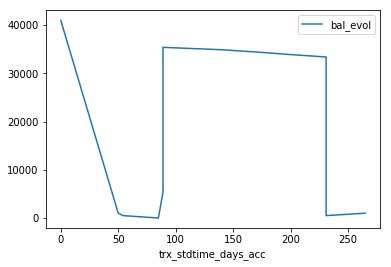

In [132]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's try to use this for a different account.

In [133]:
 a = random.choice(ln["account_ids"].unique())
print(a)

61134882946400000


### I used a = 61134882946400000.

In [134]:
ln[ln["account_ids"]==a].shape

(2, 58)

In [135]:
lna = ln[ln["account_ids"]==a]

### Let's look at this one account.

In [136]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
63302,KMOMT21,NaN,07sep2012,28oct2013,416,14,04=Diaries Interview,27jun2013,6,2013,2013_06,28sep2012,61134882946400000,1.0,61134397950700000,NaN,Liability,NaN,Formal,NaN,24jun2013,02oct2013,100,3,112137231371100000,61134397950700000,24jun2013,6,2013,2013_06,10.0,290,10,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2746,Credit card (including store card),2. New purchases on credit,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,1.0,0.0,13=Private individual or household,Inflow,12.0,0.141177,0,NaN,NaN,NaN,10.00000
22798,KMOMT21,NaN,07sep2012,28oct2013,416,14,04=Diaries Interview,02oct2013,10,2013,2013_10,28sep2012,61134882946400000,NaN,61134397950700000,NaN,Liability,Close,Formal,NaN,24jun2013,02oct2013,100,3,112138175901900000,61134397950700000,02oct2013,10,2013,2013_10,17.0,390,13,100,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2746,Credit card (including store card),6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.44828


In [137]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [141]:
lna

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir
63302,KMOMT21,NaN,07sep2012,28oct2013,416,14,04=Diaries Interview,27jun2013,6,2013,2013_06,28sep2012,61134882946400000,1.0,61134397950700000,NaN,Liability,NaN,Formal,NaN,24jun2013,02oct2013,100,3,112137231371100000,61134397950700000,24jun2013,6,2013,2013_06,10.0,290,10,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2746,Credit card (including store card),2. New purchases on credit,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,1.0,0.0,13=Private individual or household,Inflow,12.0,0.141177,0,NaN,NaN,NaN,10.00000,12.0
22798,KMOMT21,NaN,07sep2012,28oct2013,416,14,04=Diaries Interview,02oct2013,10,2013,2013_10,28sep2012,61134882946400000,NaN,61134397950700000,NaN,Liability,Close,Formal,NaN,24jun2013,02oct2013,100,3,112138175901900000,61134397950700000,02oct2013,10,2013,2013_10,17.0,390,13,100,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2746,Credit card (including store card),6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.44828,0.0


In [140]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index22798


In [142]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
63302,0,12.0,2. New purchases on credit,Inflow,Increase,12.0
22798,100,0.0,6. Closing Balance--End of last DQ,NaN,NaN,0.0


In [143]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [144]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [145]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
63302,0,12.0,2. New purchases on credit,Inflow,Increase,12.0,12.0
22798,100,0.0,6. Closing Balance--End of last DQ,NaN,NaN,0.0,12.0


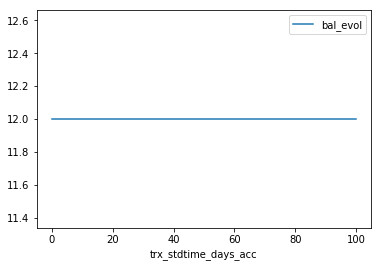

In [146]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's try to use this for a different account.

In [147]:
 a = random.choice(ln["account_ids"].unique())
print(a)

59136685821800000


### I used a =59136685821800000.

In [148]:
ln[ln["account_ids"]==a].shape

(23, 58)

In [149]:
lna = ln[ln["account_ids"]==a]

### Let's look at this one account.

In [150]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
258427,KVIHC04,NaN,06sep2012,05oct2013,394,13,06=Cleaning interview,21sep2013,9,2013,2013_09,09aug2012,59136685821800000,NaN,59134399785800000,NaN,Liability,NaN,Formal,NaN,15dec2012,20sep2013,279,9,34139185965300000,59134399785800000,15dec2012,12,2012,2012_12,19.0,100,3,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,2. New borrowing,New borrowing on financial liability,0.0,Increase,10.0,"In-kind (trade, good, service--NOT MONEY)",1.0,0.0,07=Group meeting,Inflow,6000.0,70.588230,0,agricultural inputs,70.58823,6000.0,3.448276
83600,KVIHC04,NaN,06sep2012,05oct2013,394,13,06=Cleaning interview,21sep2013,9,2013,2013_09,09aug2012,59136685821800000,NaN,59134399785800000,NaN,Liability,NaN,Formal,NaN,15dec2012,20sep2013,279,9,34139185981200000,59134399785800000,05feb2013,2,2013,2013_02,19.0,152,5,52,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,150.0,1.764706,0,NaN,NaN,NaN,5.241379
376337,KVIHC04,NaN,06sep2012,05oct2013,394,13,06=Cleaning interview,21sep2013,9,2013,2013_09,09aug2012,59136685821800000,NaN,59134399785800000,NaN,Liability,NaN,Formal,NaN,15dec2012,20sep2013,279,9,34139185987900000,59134399785800000,12feb2013,2,2013,2013_02,19.0,159,5,59,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,150.0,1.764706,0,NaN,NaN,NaN,5.482759
180653,KVIHC04,NaN,06sep2012,05oct2013,394,13,06=Cleaning interview,21sep2013,9,2013,2013_09,09aug2012,59136685821800000,NaN,59134399785800000,NaN,Liability,NaN,Formal,NaN,15dec2012,20sep2013,279,9,34139185987900000,59134399785800000,26feb2013,2,2013,2013_02,19.0,173,5,73,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,150.0,1.764706,0,NaN,NaN,NaN,5.965517
88672,KVIHC04,NaN,06sep2012,05oct2013,394,13,06=Cleaning interview,21sep2013,9,2013,2013_09,09aug2012,59136685821800000,NaN,59134399785800000,NaN,Liability,NaN,Formal,NaN,15dec2012,20sep2013,279,9,34139185987900000,59134399785800000,05mar2013,3,2013,2013_03,19.0,180,6,80,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,150.0,1.764706,0,NaN,NaN,NaN,6.206897
299390,KVIHC04,NaN,06sep2012,05oct2013,394,13,06=Cleaning interview,21sep2013,9,2013,2013_09,09aug2012,59136685821800000,NaN,59134399785800000,NaN,Liability,NaN,Formal,NaN,15dec2012,20sep2013,279,9,34139185987900000,59134399785800000,19mar2013,3,2013,2013_03,19.0,194,6,94,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individ

In [151]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [154]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 5750.


In [155]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
258427,0,6000.0,2. New borrowing,Inflow,Increase,6000.0
83600,52,150.0,3. Payments,Outflow,Decrease,-150.0
376337,59,150.0,3. Payments,Outflow,Decrease,-150.0
180653,73,150.0,3. Payments,Outflow,Decrease,-150.0
88672,80,150.0,3. Payments,Outflow,Decrease,-150.0
299390,94,150.0,3. Payments,Outflow,Decrease,-150.0
38688,101,150.0,3. Payments,Outflow,Decrease,-150.0
300531,108,150.0,3. Payments,Outflow,Decrease,-150.0
258422,114,500.0,3. Payments,Outflow,Decrease,-500.0
114909,124,100.0,3. Payments,Outflow,Decrease,-100.0


In [156]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [157]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [158]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
258427,0,6000.0,2. New borrowing,Inflow,Increase,6000.0,6000.0
83600,52,150.0,3. Payments,Outflow,Decrease,-150.0,5850.0
376337,59,150.0,3. Payments,Outflow,Decrease,-150.0,5700.0
180653,73,150.0,3. Payments,Outflow,Decrease,-150.0,5550.0
88672,80,150.0,3. Payments,Outflow,Decrease,-150.0,5400.0
299390,94,150.0,3. Payments,Outflow,Decrease,-150.0,5250.0
38688,101,150.0,3. Payments,Outflow,Decrease,-150.0,5100.0
300531,108,150.0,3. Payments,Outflow,Decrease,-150.0,4950.0
258422,114,500.0,3. Payments,Outflow,Decrease,-500.0,4450.0
114909,124,100.0,3. Payments,Outflow,Decrease,-100.0,4350.0


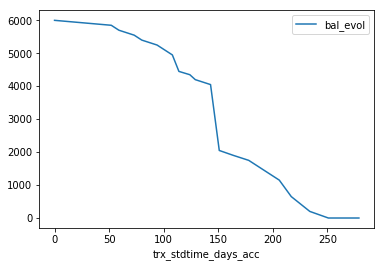

In [159]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's try to use this for a different account.

In [160]:
 a = random.choice(ln["account_ids"].unique())
print(a)

59134942469700000


### I used a =59134942469700000.

In [161]:
ln[ln["account_ids"]==a].shape

(16, 58)

In [162]:
lna = ln[ln["account_ids"]==a]

### Let's look at this one account.

In [163]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
23025,KVIHC35,NaN,05aug2012,22sep2013,413,14,04=Diaries Interview,09oct2012,10,2012,2012_10,07aug2012,59134942469700000,1.0,59134311227800000,NaN,Liability,Start,Formal,NaN,09oct2012,20sep2013,346,11,59134976561100000,59134311227800000,09oct2012,10,2012,2012_10,1.0,65,2,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,108000.0,1270.58800,0,NaN,NaN,NaN,2.241379
277437,KVIHC35,NaN,05aug2012,22sep2013,413,14,04=Diaries Interview,05nov2012,11,2012,2012_11,07aug2012,59134942469700000,NaN,59134311227800000,NaN,Liability,NaN,Formal,NaN,09oct2012,20sep2013,346,11,59135211421200000,59134311227800000,18oct2012,10,2012,2012_10,2.0,74,2,9,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.000000,07=Group meeting,Outflow,12000.0,141.17650,0,NaN,NaN,NaN,2.551724
149656,KVIHC35,NaN,05aug2012,22sep2013,413,14,04=Diaries Interview,03dec2012,12,2012,2012_12,07aug2012,59134942469700000,NaN,59134311227800000,NaN,Liability,NaN,Formal,NaN,09oct2012,20sep2013,346,11,59135453246700000,59134311227800000,18nov2012,11,2012,2012_11,3.0,105,3,40,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.000000,07=Group meeting,Outflow,12000.0,141.17650,0,NaN,NaN,NaN,3.620690
19200,KVIHC35,NaN,05aug2012,22sep2013,413,14,06=Cleaning interview,21sep2013,9,2013,2013_09,07aug2012,59134942469700000,NaN,59134311227800000,NaN,Liability,NaN,Formal,NaN,09oct2012,20sep2013,346,11,34138710898300000,59134311227800000,15dec2012,12,2012,2012_12,20.0,132,4,67,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,2000.0,23.52941,0,NaN,NaN,NaN,4.551724
427271,KVIHC35,NaN,05aug2012,22sep2013,413,14,06=Cleaning interview,21sep2013,9,2013,2013_09,07aug2012,59134942469700000,NaN,59134311227800000,NaN,Liability,NaN,Formal,NaN,09oct2012,20sep2013,346,11,34138710797700000,59134311227800000,15dec2012,12,2012,2012_12,20.0,132,4,67,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,2. New borrowing,New borrowing on financial liability,0.0,Increase,3.0,"Transfer into bank, SACCO, or MFI account",0.0,2.189854,"06=Direct deposit, payroll deduction, or stand...",Inflow,10000.0,117.64710,0,NaN,NaN,NaN,4.551724
260728,KVIHC35,NaN,05aug2012,22sep2013,413,14,04=Diaries Interview,07jan2013,1,2013,2013_01,07aug2012,59134942469700000,NaN,59134311227800000,NaN,Liability,NaN,Formal,NaN,09oct2012,20sep2013,346,11,59135756256100000,59134311227800000,20dec2012,12,2012,2012_12,4.0,137,4,72,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual B

In [164]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [165]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 21202.


In [166]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
23025,0,108000.0,1. Starting balance (today),NaN,Increase,108000.0
277437,9,12000.0,3. Payments,Outflow,Decrease,-12000.0
149656,40,12000.0,3. Payments,Outflow,Decrease,-12000.0
19200,67,2000.0,5. Interest accruing,NaN,Increase,2000.0
427271,67,10000.0,2. New borrowing,Inflow,Increase,10000.0
260728,72,12350.0,3. Payments,Outflow,Decrease,-12350.0
288513,100,12350.0,3. Payments,Outflow,Decrease,-12350.0
288508,135,13000.0,3. Payments,Outflow,Decrease,-13000.0
248010,163,12000.0,3. Payments,Outflow,Decrease,-12000.0
208412,191,12000.0,3. Payments,Outflow,Decrease,-12000.0


In [173]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [174]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [175]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
23025,0,108000.0,1. Starting balance (today),NaN,Increase,108000.0,108000.0
277437,9,12000.0,3. Payments,Outflow,Decrease,-12000.0,96000.0
149656,40,12000.0,3. Payments,Outflow,Decrease,-12000.0,84000.0
19200,67,2000.0,5. Interest accruing,NaN,Increase,2000.0,86000.0
427271,67,10000.0,2. New borrowing,Inflow,Increase,10000.0,96000.0
260728,72,12350.0,3. Payments,Outflow,Decrease,-12350.0,83650.0
288513,100,12350.0,3. Payments,Outflow,Decrease,-12350.0,71300.0
288508,135,13000.0,3. Payments,Outflow,Decrease,-13000.0,58300.0
248010,163,12000.0,3. Payments,Outflow,Decrease,-12000.0,46300.0
208412,191,12000.0,3. Payments,Outflow,Decrease,-12000.0,34300.0


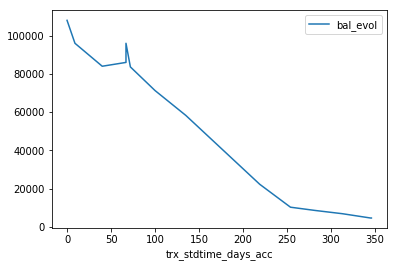

In [176]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's try to use this for a different account.

In [177]:
 a = random.choice(ln["account_ids"].unique())
print(a)

56134711763300000


### I used a =56134711763300000

In [179]:
ln[ln["account_ids"]==a].shape

(19, 58)

In [180]:
lna = ln[ln["account_ids"]==a]

### Let's look at this one account.

In [181]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
114,KELDK36,NaN,14sep2012,05nov2013,417,14,06=Cleaning interview,16oct2013,10,2013,2013_10,22sep2012,56134711763300000,NaN,56134381592900000,NaN,Liability,Start,Formal,NaN,22sep2012,15oct2013,388,13,105138431310300000,56134381592900000,22sep2012,9,2012,2012_09,17.0,8,0,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3502,Group Enterprise Loan,1. Starting balance (today)--individual part,NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,73821.0,868.48240,0,NaN,NaN,NaN,0.275862
331750,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,20oct2012,10,2012,2012_10,22sep2012,56134711763300000,1.0,56134381592900000,NaN,Liability,NaN,Formal,NaN,22sep2012,15oct2013,388,13,56135115834000000,56134381592900000,12oct2012,10,2012,2012_10,1.0,28,0,20,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3502,Group Enterprise Loan,3. Payments--individual portion,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.000000,"01=Bank, MFI, SACCO, insurance branch",Outflow,30000.0,352.94120,0,0,0.0,0.0,0.965517
435549,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,15nov2012,11,2012,2012_11,22sep2012,56134711763300000,NaN,56134381592900000,NaN,Liability,NaN,Formal,NaN,22sep2012,15oct2013,388,13,56135314046500000,56134381592900000,08nov2012,11,2012,2012_11,2.0,55,1,47,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3502,Group Enterprise Loan,3. Payments--individual portion,Repayment on financial liability,0.0,Decrease,1.0,Cash,0.0,8.651168,"01=Bank, MFI, SACCO, insurance branch",Outflow,12770.0,150.23530,0,0,0.0,0.0,1.896552
435595,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,01dec2012,12,2012,2012_12,22sep2012,56134711763300000,NaN,56134381592900000,NaN,Liability,NaN,Formal,NaN,22sep2012,15oct2013,388,13,56135437467200000,56134381592900000,13nov2012,11,2012,2012_11,3.0,60,2,52,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3502,Group Enterprise Loan,3. Payments--individual portion,Repayment on financial liability,0.0,Decrease,1.0,Cash,0.0,8.651168,"01=Bank, MFI, SACCO, insurance branch",Outflow,31051.0,365.30590,0,0,0.0,0.0,2.068965
435571,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,01dec2012,12,2012,2012_12,22sep2012,56134711763300000,NaN,56134381592900000,NaN,Liability,NaN,Formal,NaN,22sep2012,15oct2013,388,13,56135437472700000,56134381592900000,15nov2012,11,2012,2012_11,3.0,62,2,54,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3502,Group Enterprise Loan,2. New borrowing--individual portion,New borrowing on financial liability,0.0,Increase,3.0,"Transfer into bank, SACCO, or MFI account",0.0,8.651168,"01=Bank, MFI, SACCO, insurance branch",Inflow,100000.0,1176.47100,0,0,0.0,0.0,2.137931
435506,KELDK36,NaN,14sep2012,05nov2013,417,14,04=Diaries Interview,01dec2012,12,2012,2012_12,22sep2012,56134711763300000,NaN,56134381592900000,NaN,Liability,NaN,Formal,NaN,22sep2012,15oct2013,388,13,56135437472700000,56134381592900000,15nov2012,11,2012,2012_11,3.0,62,2,54,1,find

In [182]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [183]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 23102.


In [184]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
114,0,73821.0,1. Starting balance (today)--individual part,NaN,Increase,73821.0
331750,20,30000.0,3. Payments--individual portion,Outflow,Decrease,-30000.0
435549,47,12770.0,3. Payments--individual portion,Outflow,Decrease,-12770.0
435595,52,31051.0,3. Payments--individual portion,Outflow,Decrease,-31051.0
435571,54,100000.0,2. New borrowing--individual portion,Inflow,Increase,100000.0
435506,54,1500.0,4. Any known fees--individual portion,NaN,Increase,1500.0
3115,54,8000.0,5. Interest accruing--individual portion,NaN,Increase,8000.0
434445,76,9000.0,3. Payments--individual portion,Outflow,Decrease,-9000.0
434424,111,9000.0,3. Payments--individual portion,Outflow,Decrease,-9000.0
262490,139,9000.0,3. Payments--individual portion,Outflow,Decrease,-9000.0


In [185]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [186]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [187]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
114,0,73821.0,1. Starting balance (today)--individual part,NaN,Increase,73821.0,73821.0
331750,20,30000.0,3. Payments--individual portion,Outflow,Decrease,-30000.0,43821.0
435549,47,12770.0,3. Payments--individual portion,Outflow,Decrease,-12770.0,31051.0
435595,52,31051.0,3. Payments--individual portion,Outflow,Decrease,-31051.0,0.0
435571,54,100000.0,2. New borrowing--individual portion,Inflow,Increase,100000.0,100000.0
435506,54,1500.0,4. Any known fees--individual portion,NaN,Increase,1500.0,101500.0
3115,54,8000.0,5. Interest accruing--individual portion,NaN,Increase,8000.0,109500.0
434445,76,9000.0,3. Payments--individual portion,Outflow,Decrease,-9000.0,100500.0
434424,111,9000.0,3. Payments--individual portion,Outflow,Decrease,-9000.0,91500.0
262490,139,9000.0,3. Payments--individual portion,Outflow,Decrease,-9000.0,82500.0


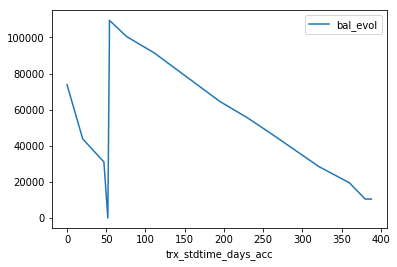

In [188]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")